# Example 1
Comparing hypercubes from datafiles.

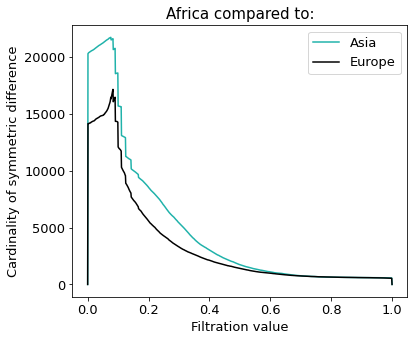

The area under the curve for Africa vs Asia is:  4926.283371419677
The area under the curve for Africa vs Europe is:  3561.658046167461


In [1]:
#import functions and fix random seed
from main_Functions import WFCC, WFCCplot, impor

#open datafiles. .csv or .txt files with columns: Start vertex | End vertex | Weight  
afri = impor("./Data_files_hypercubes/Klebsiella/transitions_Africa_15.txt") 
asia = impor("./Data_files_hypercubes/Klebsiella/transitions_Asia_15.txt")   
euro = impor("./Data_files_hypercubes/Klebsiella/transitions_Europe_15.txt") 

#pick the main hypercube to compare with the others
g0 = afri

#group together the hypercubes to compare with hypercube g0
g1 = [asia, euro]

#define labels and colours
label_g0='Africa'
labels_g1=['Asia', 'Europe']
colors=['lightseagreen', 'black']

#call the algorithm WFCC
WFCCplot(g0, g1, label_g0, labels_g1, colors, log=False, fVals = 1000, sort=False, complete = False)

#get curve values where xval is the filtration values and yval the cardinality symmetric difference
xval1, yval1 = WFCC(afri,asia,fVals = 1000, sort=False, complete = False)
xval2, yval2 = WFCC(afri,euro,fVals = 1000, sort=False, complete = False)

# Example 2
Comparing random hypercubes with different biases.


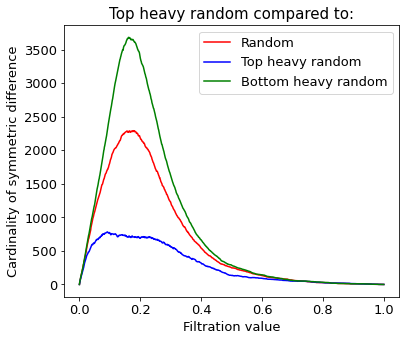

The area under the curve for Top heavy random vs Random is:  647.2378234794922
The area under the curve for Top heavy random vs Top heavy random is:  284.05277046514584
The area under the curve for Top heavy random vs Bottom heavy random is:  897.2783595966262


In [2]:
#import functions and fix random seed
from main_Functions import WFCCplot, randcube

#dimnesion of the hypercube n
n=10

#define the random hypercubes to compare
g0 = randcube(n,bias = 1)
g1 = randcube(n,bias = 0)
g2 = randcube(n,bias = 1)
g3 = randcube(n,bias = 2)

#group together the hypercubes to compare with hypercube g0
g1=[g1,g2,g3]

#define labels and colours
label_g0='Top heavy random'
labels_g1=['Random', 'Top heavy random', 'Bottom heavy random']
colors=['red', 'blue', 'green']

#call the algorithm WFCC
WFCCplot(g0, g1, label_g0, labels_g1, colors, log=False, fVals = 1000, sort=False, complete = False)